In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.layers import Convolution2D,Dropout,Flatten,MaxPooling2D,Conv2D,LeakyReLU
from keras.regularizers import l2

Using TensorFlow backend.


In [168]:
import cv2
import os
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img1=cv2.resize(img,(64,64))
            images.append(img1)
    return images

In [169]:
amir=load_images_from_folder('./AamirKhan/')
salman=load_images_from_folder('./SalmanKhan/')
shahruk=load_images_from_folder('./ShahrukhKhan/')

In [170]:
train_amir = np.array(amir)
train_salman = np.array(salman)
train_shahruk= np.array(shahruk)
print(train_amir.shape)
print(train_salman.shape)
print(train_shahruk.shape)

(433, 64, 64, 3)
(401, 64, 64, 3)
(411, 64, 64, 3)


In [171]:
train_amir_label=np.zeros(len(train_amir))
train_salman_label=np.ones(len(train_salman))
train_shahruk_label=np.ones(len(train_shahruk))
for i in range(len(train_shahruk_label)):
    train_shahruk_label[i]=2

In [172]:
X=np.concatenate((train_amir,train_salman,train_shahruk))
y=np.concatenate((train_amir_label,train_salman_label,train_shahruk_label))

In [173]:
print(X.shape)
print(y.shape)

(1245, 64, 64, 3)
(1245,)


In [174]:
np.unique(y)

array([0., 1., 2.])

In [175]:
y_label =to_categorical(y)
print(y_label[0])
print(y_label[1200])
print(y_label[500])

[1. 0. 0.]
[0. 0. 1.]
[0. 1. 0.]


In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.33, random_state=42)

In [177]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255
X_test=X_test/255

In [178]:
print(X_train.shape)
print(X_test.shape)

(834, 64, 64, 3)
(411, 64, 64, 3)


In [186]:
batch_size = 64
epochs = 40
num_classes = 3
input_shape=(64,64,3)

In [184]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=input_shape,padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(3, activation='softmax'))

In [185]:
fashion_model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [187]:
fashion_train=fashion_model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test, y_test),shuffle=True)

Train on 834 samples, validate on 411 samples
Epoch 1/40
834/834 [==============================] - 12s 14ms/step - loss: 1.1536 - acc: 0.3309 - val_loss: 1.0704 - val_acc: 0.3942
Epoch 2/40
834/834 [==============================] - 12s 14ms/step - loss: 1.0573 - acc: 0.4137 - val_loss: 0.9595 - val_acc: 0.5255
Epoch 3/40
834/834 [==============================] - 12s 15ms/step - loss: 0.9309 - acc: 0.5348 - val_loss: 1.1781 - val_acc: 0.4039
Epoch 4/40
834/834 [==============================] - 11s 13ms/step - loss: 0.9824 - acc: 0.4892 - val_loss: 0.8916 - val_acc: 0.6131
Epoch 5/40
834/834 [==============================] - 11s 14ms/step - loss: 0.8375 - acc: 0.6103 - val_loss: 0.7802 - val_acc: 0.6545
Epoch 6/40
834/834 [==============================] - 11s 14ms/step - loss: 0.7337 - acc: 0.6823 - val_loss: 0.7612 - val_acc: 0.6545
Epoch 7/40
834/834 [==============================] - 11s 13ms/step - loss: 0.6553 - acc: 0.7374 - val_loss: 0.7160 - val_acc: 0.6959
Epoch 8/40
834/8

In [188]:
test_eval = fashion_model.evaluate(X_test, y_test, verbose=0)

In [189]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.44815014632658945
Test accuracy: 0.8832116802823514


Text(0.5, 1.0, 'Training and validation loss')

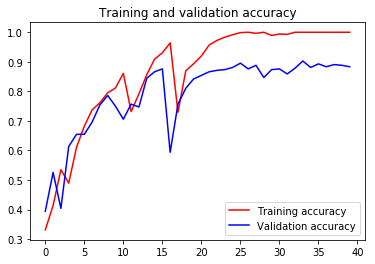

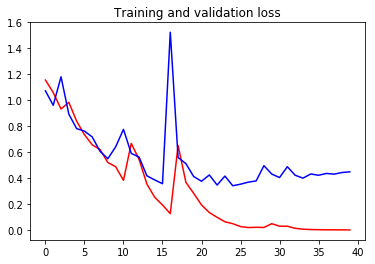

In [190]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [191]:
testdata= load_images_from_folder('../Q1_TestData/')

In [192]:
testimages=np.array(testdata)
testimages.shape

(309, 64, 64, 3)

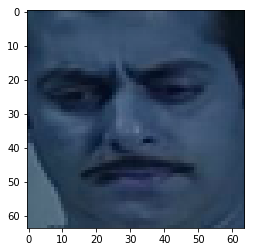

In [193]:
plt.imshow(testimages[0])
plt.show()

In [205]:
len(predicted_classes1)
predicted_classes1 = np.argmax(np.round(predicted_classes),axis=1)


309

In [194]:
predicted_classes = fashion_model.predict(testimages)

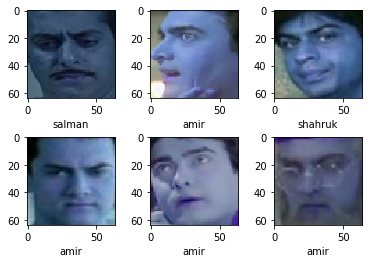

In [254]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
for i in range(0,6):
    ax = fig.add_subplot(2, 3, i+1)
    plt.imshow(testimages[i])
    if (predicted_classes1[i]==0):
        plt.xlabel('amir')
    if (predicted_classes1[i]==1):
        plt.xlabel('salman')
    if (predicted_classes1[i]==2):
        plt.xlabel('shahruk')    
plt.show()